<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



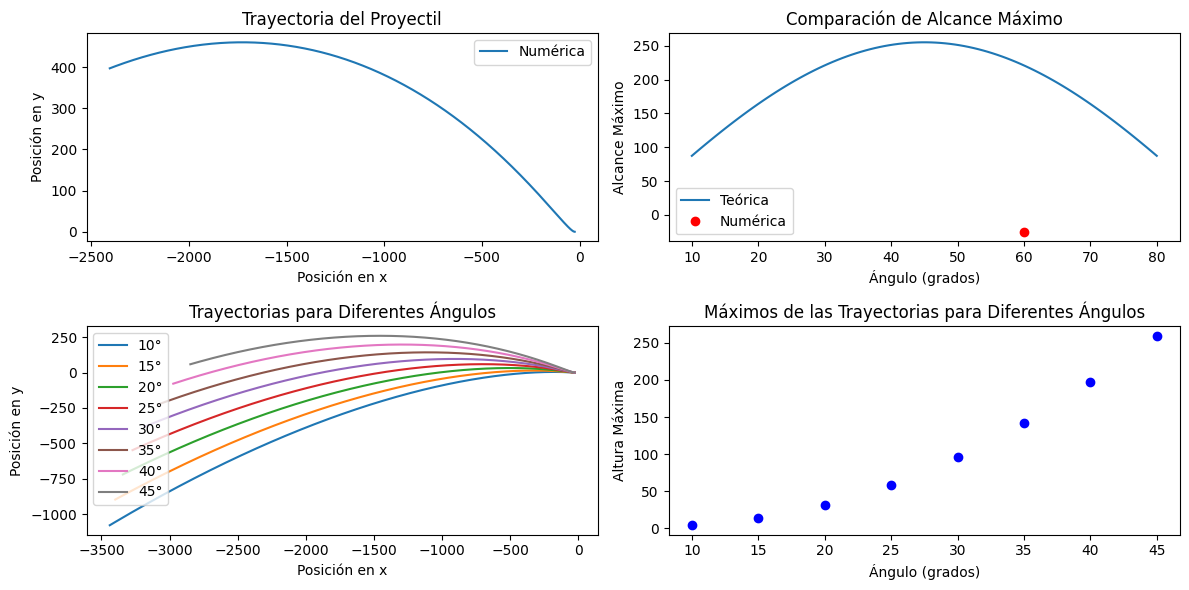

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del problema
b = 0.05
theta0 = 60  # en grados
u = 50 / 2  # v0/2
alpha = np.pi
v0 = 50
g = 9.8
# Convertir ángulos a radianes
theta0_rad = np.radians(theta0)
alpha_rad = np.radians(alpha)

# Ecuaciones diferenciales del movimiento del proyectil
def proyectil(y, t, b, alpha, u, theta0_rad, v0):
    vx, vy = y
    dxdt = u * np.cos(alpha) - (v0 * np.cos(theta0_rad) - u * np.cos(alpha)) / b * (1 - np.exp(-b * t))
    dydt = (g / b + v0 * np.sin(theta0_rad) - u * np.sin(alpha)) / b * (1 - np.exp(-b * t)) - (g / b - u * np.sin(alpha)) * t
    return [dxdt, dydt]

# Condiciones iniciales y tiempo
y0 = [u * np.cos(alpha), u * np.sin(alpha)]
t = np.linspace(0, 10, 1000)  # ajusta el tiempo según sea necesario

# Resolución de las ecuaciones diferenciales
sol = odeint(proyectil, y0, t, args=(b, alpha, u, theta0_rad, v0))

# Solución teórica para el alcance máximo
theta_range = np.radians(np.linspace(10, 80, 100))
R_theoretical = (v0**2 * np.sin(2 * theta_range)) / g

# Gráficos
plt.figure(figsize=(12, 6))

# Trayectoria del proyectil
plt.subplot(2, 2, 1)
plt.plot(sol[:, 0], sol[:, 1], label='Numérica')
plt.title('Trayectoria del Proyectil')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.legend()

# Comparación de la solución numérica y teórica para el alcance máximo
plt.subplot(2, 2, 2)
plt.plot(np.degrees(theta_range), R_theoretical, label='Teórica')
plt.plot(np.degrees(theta0_rad), np.max(sol[:, 0]), 'ro', label='Numérica')
plt.title('Comparación de Alcance Máximo')
plt.xlabel('Ángulo (grados)')
plt.ylabel('Alcance Máximo')
plt.legend()

# Trayectorias para diferentes ángulos
plt.subplot(2, 2, 3)
for theta in range(10, 46, 5):
    theta_rad = np.radians(theta)
    sol = odeint(proyectil, y0, t, args=(b, alpha, u, theta_rad, v0))
    plt.plot(sol[:, 0], sol[:, 1], label=f'{theta}°')
plt.title('Trayectorias para Diferentes Ángulos')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.legend()

# Máximos de las trayectorias para diferentes ángulos
plt.subplot(2, 2, 4)
max_positions = []
angles = np.arange(10, 46, 5)
for theta in angles:
    theta_rad = np.radians(theta)
    sol = odeint(proyectil, y0, t, args=(b, alpha, u, theta_rad, v0))
    max_positions.append(np.max(sol[:, 1]))
plt.plot(angles, max_positions, 'bo')
plt.title('Máximos de las Trayectorias para Diferentes Ángulos')
plt.xlabel('Ángulo (grados)')
plt.ylabel('Altura Máxima')

plt.tight_layout()
plt.show()


Solucion teorica